In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.insert(0,'..')
# sys.path.insert(
#     0,
#     os.path.abspath(
#         # os.path.join(os.path.dirname(__file__), "..")
#         # os.path.join(os.path.abspath(''), "..")
#         os.path.join('.', "..")
#     ),
# )

from settings import *
from lattice.opticallattice import *

# Lithium lattices

In [3]:
LiGr_waist = 120e-6
LiGr_power = 2
LiIr_waist = 350e-6
LiIr_power = 9 * 0.7 / 2


lithiumIr = OpticalLatticeAngle(
    waist=350e-6,
    half_angle=13.37,
    # power=40 / 4/3,
    power=9 * 0.7 / 2,
)

lithiumGr = OpticalLatticeAngle(
    waist=120e-6,
    half_angle=13.37,
    power=2,
    wavelen=532e-9,
)


print("IR LATIICE\n")
lithiumIr.print_params()
print("\nGREEN LATIICE\n")
lithiumGr.print_params()

IR LATIICE

Power per beam: 3.1 W
Waists: 350.000, 350.000 um
Lattice spacing: 2.301 um
Recoil energy: 1562.618 Hz
Depth: 82.511 kHz, 52.803 Er, 3.964 uK
On site: 22.710 kHz, 1.091 uK

GREEN LATIICE

Power per beam: 2.0 W
Waists: 120.000, 120.000 um
Lattice spacing: 1.150 um
Recoil energy: 6250.474 Hz
Depth: -454.415 kHz, -72.701 Er, -21.832 uK
On site: 106.589 kHz, 5.121 uK


# Lattice Depths as a function of power and waists

In [4]:
waistGr = np.linspace(80e-6, 200e-6, 1000)
powersGr = np.linspace(1.5, 3.75, 1000)  # power per beam


wGr, pGr = np.meshgrid(waistGr, powersGr)


yGr = OpticalLatticeAngle(
    waist=wGr, half_angle=14, power=pGr, wavelen=532e-9
)


waistIr = np.linspace(100e-6, 400e-6)
powersIr = np.linspace(2.5, 6.5, 1000)
wIr, pIr = np.meshgrid(waistIr, powersIr)

yIr = OpticalLatticeAngle(
    waist=wIr,
    waisty=100e-6,
    half_angle=14,
    power=pIr,
    wavelen=1064e-9,
)

In [5]:
fig, axs = plt.subplots(1, 2)


""" GREEN """
axs[0].set_title("Short Lattice")


im = axs[0].pcolormesh(
    wGr / 1e-6,
    pGr,
    -yGr.U_in_Er,
)

fig.colorbar(im)
CS1 = axs[0].contour(
    wGr / 1e-6,
    pGr,
    -yGr.U_in_Er,
    levels=[25, 50, -lithiumGr.U_in_Er, 100, 125, 150, 200],
    cmap="mako",
)
axs[0].clabel(CS1)
axs[0].plot(
    lithiumGr.waist / 1e-6,
    lithiumGr.power,
    marker="o",
    markersize="5",
)

axs[0].text(125, 2, "Li1.0", color="C0")

im = axs[1].pcolormesh(wIr / 1e-6, pIr, yIr.U_in_Er)

axs[1].set_title("Long Lattice")
fig.colorbar(im)
CS = plt.contour(
    wIr / 1e-6,
    pIr,
    yIr.U_in_Er,
    levels=[40, lithiumIr.U_in_Er, 100, 200, 300],
    cmap="mako",
)
axs[1].plot(
    LiIr_waist / 1e-6,
    LiIr_power,
    marker="o",
    markersize="5",
)
axs[1].plot(
    lithiumIr.waist / 1e-6,
    lithiumIr.power,
    marker="o",
    markersize="5",
)

# levels=[45, 50, 70, 75, 100]
axs[1].clabel(CS)
axs[1].text(270, 3.1, "Li1.0", color="C1")

fig.suptitle("Trap Depths in Er")
for ax in axs:ha; p
    ax.set_xlabel("waist / um")
    ax.set_ylabel("Power per beam / W")

fig.tight_layout()

IndentationError: unexpected indent (1242939268.py, line 62)

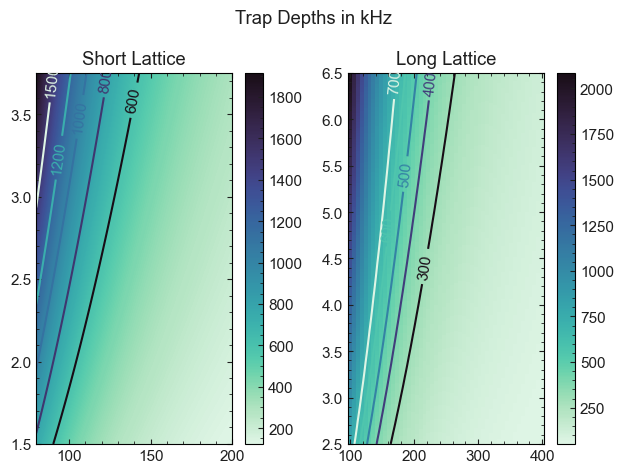

In [ ]:
fig, axs = plt.subplots(1, 2)

im = axs[0].pcolormesh(wGr / 1e-6, pGr, -yGr.U / 1e3)

axs[0].set_title("Short Lattice")


fig.colorbar(im)
CS1 = axs[0].contour(
    wGr / 1e-6,
    pGr,
    -yGr.U / 1e3,
    levels=[600, 800, 1000, 1200, 1500],
    cmap="mako",
)
axs[0].clabel(CS1)

im = axs[1].pcolormesh(wIr / 1e-6, pIr, yIr.U / 1e3)

axs[1].set_title("Long Lattice")
fig.colorbar(im)
CS = plt.contour(
    wIr / 1e-6,
    pIr,
    yIr.U / 1e3,
    levels=[300, 400, 500, 600, 700],
    cmap="mako",
)

# levels=[45, 50, 70, 75, 100]
axs[1].clabel(CS)


fig.suptitle("Trap Depths in kHz")

fig.tight_layout()

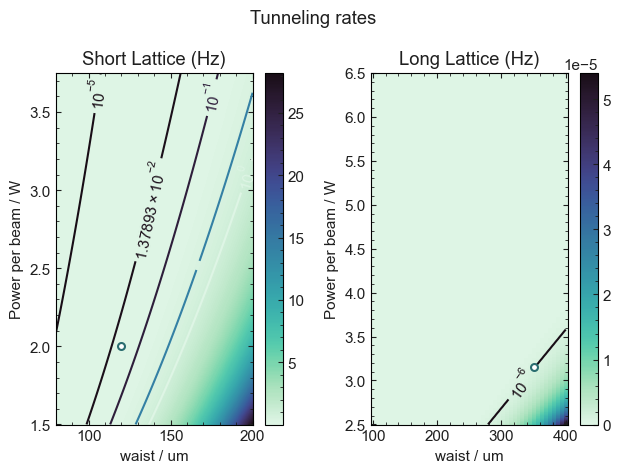

In [7]:
import matplotlib.ticker as ticker

fmt = ticker.LogFormatterSciNotation()
fmt.create_dummy_axis()

fig, axs = plt.subplots(1, 2)


for ax in axs:
    ax.set_xlabel("waist / um")
    ax.set_ylabel("Power per beam / W")


axs[0].set_title("Short Lattice (Hz)")
im = axs[0].pcolormesh(wGr / 1e-6, pGr, yGr.t())
fig.colorbar(im)


CS1 = axs[0].contour(
    wGr / 1e-6,
    pGr,
    yGr.t(),
    levels=[1e-5, lithiumGr.t(), 1e-1, 0.5, 1],
    cmap="mako",
)


axs[0].clabel(CS1, fmt=fmt)


axs[0].plot(
    lithiumGr.waist / 1e-6,
    lithiumGr.power,
    marker="o",
    markersize="5",
)


axs[1].set_title("Long Lattice (Hz)")
im = axs[1].pcolormesh(wIr / 1e-6, pIr, yIr.t())
fig.colorbar(im)


CS2 = axs[1].contour(
    wIr / 1e-6,
    pIr,
    yIr.t(),
    levels=[1e-6, 0.001, 0.01, lithiumIr.t(), 0.1],
    cmap="mako",
)


axs[1].clabel(CS2, fmt=fmt)


axs[1].plot(
    lithiumIr.waist / 1e-6,
    lithiumIr.power,
    marker="o",
    markersize="5",
)


fig.suptitle("Tunneling rates")


fig.tight_layout()

In [6]:
yIr.__dict__

{'waisty': 0.0001,
 'waist': array([[0.0001    , 0.00010612, 0.00011224, ..., 0.00038776, 0.00039388,
         0.0004    ],
        [0.0001    , 0.00010612, 0.00011224, ..., 0.00038776, 0.00039388,
         0.0004    ],
        [0.0001    , 0.00010612, 0.00011224, ..., 0.00038776, 0.00039388,
         0.0004    ],
        ...,
        [0.0001    , 0.00010612, 0.00011224, ..., 0.00038776, 0.00039388,
         0.0004    ],
        [0.0001    , 0.00010612, 0.00011224, ..., 0.00038776, 0.00039388,
         0.0004    ],
        [0.0001    , 0.00010612, 0.00011224, ..., 0.00038776, 0.00039388,
         0.0004    ]]),
 'half_angle': 14,
 'power': array([[2.5       , 2.5       , 2.5       , ..., 2.5       , 2.5       ,
         2.5       ],
        [2.504004  , 2.504004  , 2.504004  , ..., 2.504004  , 2.504004  ,
         2.504004  ],
        [2.50800801, 2.50800801, 2.50800801, ..., 2.50800801, 2.50800801,
         2.50800801],
        ...,
        [6.49199199, 6.49199199, 6.49199199, ..., 6.